Ref: https://github.com/phanakata/ML_for_kirigami_design/blob/master/models/CNN_regression/convert_coarse_to_fine.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
raw_data= np.loadtxt('./15grid_shuffled.dat')
raw_data.shape

(29791, 18)

In [3]:
coarse_image = raw_data[:, 0:15].reshape(-1, 3, 5)
coarse_image.shape

(29791, 3, 5)

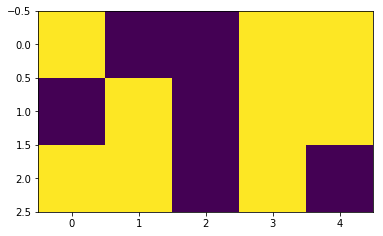

In [4]:
plt.imshow(coarse_image[0])

# Convert coarse grid to fine grid

In [6]:
from generate_lattice_ref import convert_to_fine_grid

In [7]:
%time fine_image= convert_to_fine_grid(raw_data)

CPU times: user 38.9 s, sys: 899 ms, total: 39.8 s
Wall time: 41 s


In [8]:
fine_image.shape

(29791, 30, 80)

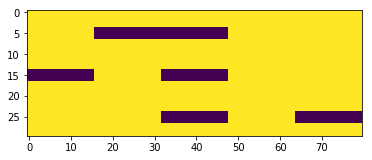

In [11]:
plt.imshow(fine_image[0])

# Wrap as xarray Dataset

In [15]:
ds = xr.Dataset({'coarse_image': (['sample', 'y_c', 'x_c'],  coarse_image),
                 'fine_image': (['sample', 'y', 'x'], fine_image),
                 'strain': (['sample'], raw_data[:, 15]),
                 'stress': (['sample'], raw_data[:, 17]),
                })

In [16]:
ds

<xarray.Dataset>
Dimensions:       (sample: 29791, x: 80, x_c: 5, y: 30, y_c: 3)
Dimensions without coordinates: sample, x, x_c, y, y_c
Data variables:
    coarse_image  (sample, y_c, x_c) float64 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 ...
    fine_image    (sample, y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    strain        (sample) float64 0.2772 0.3052 0.2488 0.2934 0.4899 0.5506 ...
    stress        (sample) float64 46.2 65.82 56.71 54.16 43.97 26.37 18.84 ...

In [27]:
ds.to_netcdf('./graphene_processed.nc')

# Plot data

In [29]:
ds = xr.open_dataset('./graphene_processed.nc')

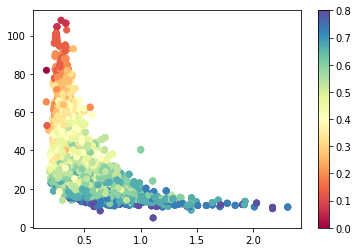

In [30]:
cut_density = 1 - ds['coarse_image'].mean(dim=['x_c', 'y_c'])
plt.scatter(ds['strain'], ds['stress'], c=cut_density, cmap=plt.cm.Spectral)
plt.colorbar()

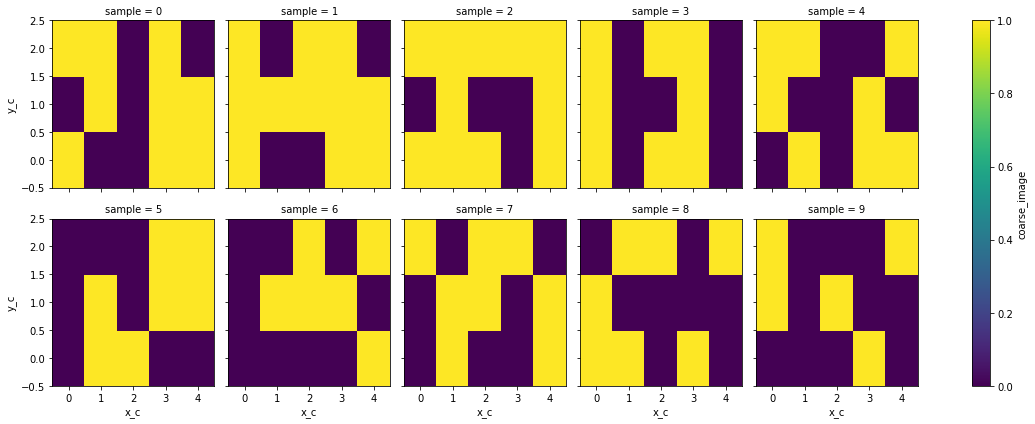

In [39]:
ds['coarse_image'].isel(sample=slice(0, 10)).plot(col='sample', col_wrap=5)

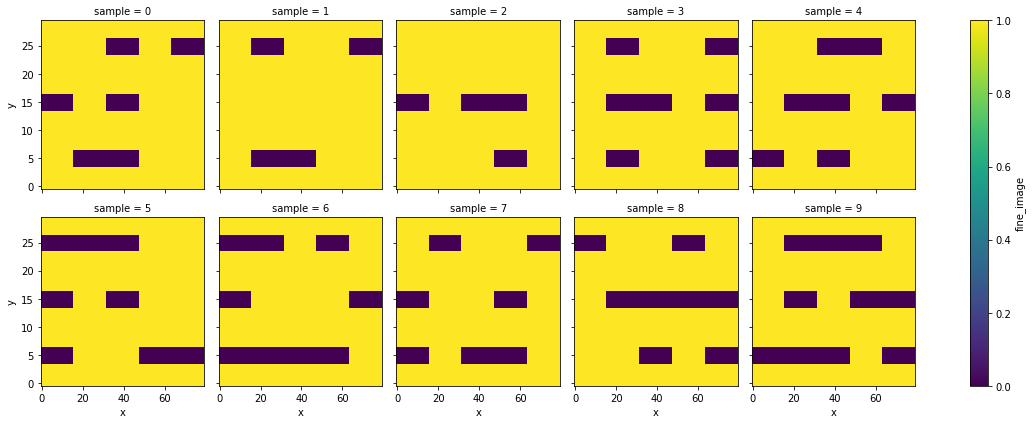

In [40]:
ds['fine_image'].isel(sample=slice(0, 10)).plot(col='sample', col_wrap=5)